# Explicit 2D Benchmarks

This file demonstrates how to generate, plot, and output data for 1d benchmarks

Choose from:


1. Nguyen_09
1. Nguyen_10
1. Nguyen_11
1. Nguyen_12


### Imports

In [8]:
from pypge.benchmarks import explicit

import numpy as np

# visualization libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import gridspec

# plot the visuals in ipython
%matplotlib inline


### Generate the data with noise

In [21]:
# Set your output directories
img_dir = "../img/benchmarks/explicit/"
data_dir = "../data/benchmarks/explicit/"

# choose your problem here
prob = explicit.Nguyen_12(noise=5.0, npts=2000)

# you can also specify the following params as keyword arguments
#
# params = {
#     'name': "Koza_01",
#     'xs_str': ["x"],
#     'eqn_str': "x**4 + x**3 + x**2 + x",
#     'xs_params': [ (-4.0,4.0) ],
#     'npts': 200,
#     'noise': 1.0
# }

# or make your own with the following
#
# explicit.Explicit_1D(params):


{   'eqn_str': 'x**4 - x**3 + 0.5*y**2 - y',
    'name': 'Nguyen_12',
    'noise': 5.0,
    'npts': 2000,
    'xs': [x, y],
    'xs_params': [(-8.0, 8.0), (-8.0, 8.0)],
    'xs_str': ['x', 'y']}


### Plot inline and save image

Nguyen_12 x**4 - x**3 + 0.5*y**2 - y
(2, 2000)


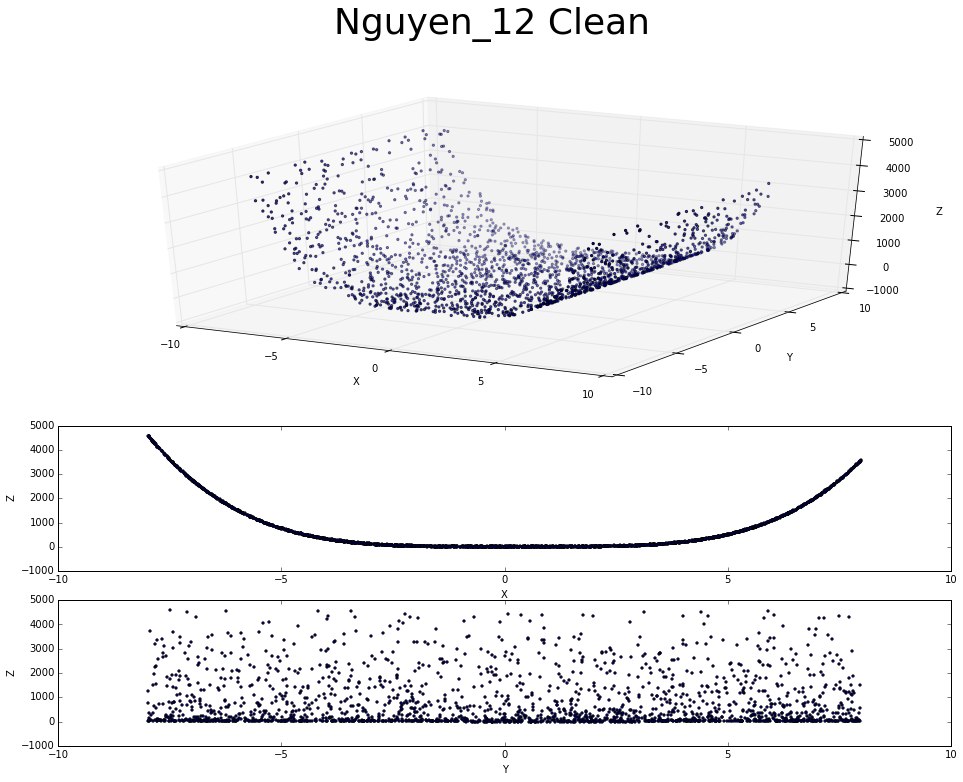

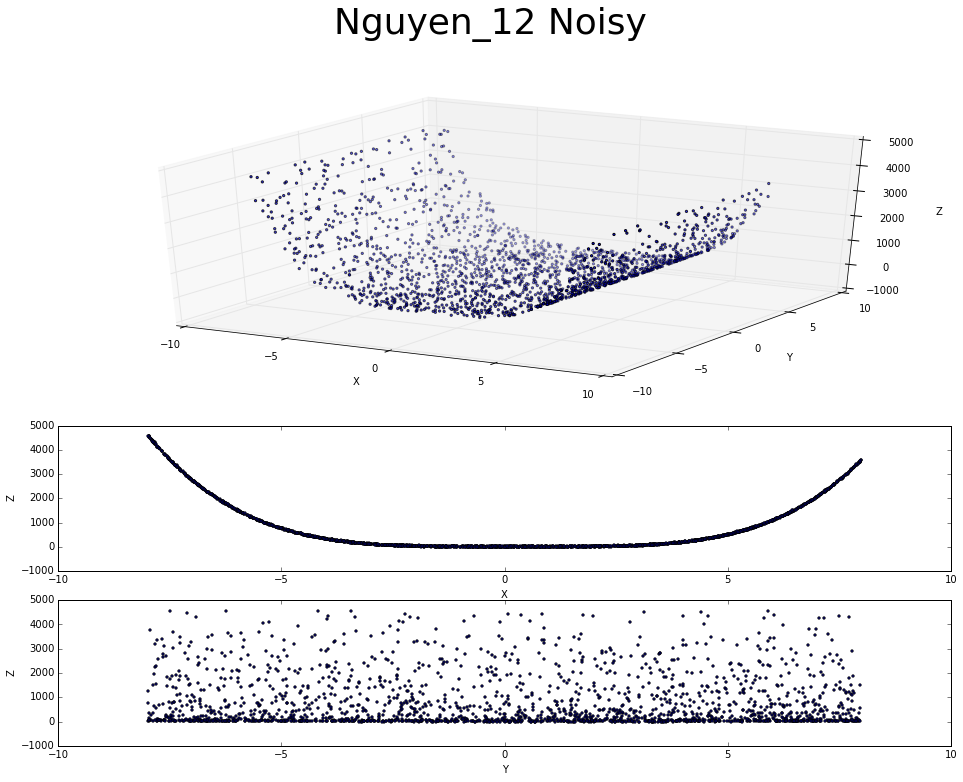

In [22]:
print prob['name'], prob['eqn']
print prob['xpts'].shape

xs = prob['xpts'][0]
ys = prob['xpts'][1]
zs = prob['ypure']

fig = plt.figure()
fig.set_size_inches(16, 12)
gs = gridspec.GridSpec(4, 2)
fig.suptitle(prob['name'] + " Clean", fontsize=36)

ax1 = fig.add_subplot(gs[0:2,:], projection='3d')
ax1.scatter(xs, ys, zs, c='b', marker='.')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

ax2 = fig.add_subplot(gs[2,:])
ax2.scatter(xs, zs, marker='.')
ax2.set_xlabel('X')
ax2.set_ylabel('Z')

ax3 = fig.add_subplot(gs[3,:])
ax3.scatter(ys, zs, marker='.')
ax3.set_xlabel('Y')
ax3.set_ylabel('Z')
plt.savefig(img_dir + prob['name'].lower() + "_clean.png", dpi=200)
plt.show()



zs = prob['ypts']
fig = plt.figure()
fig.set_size_inches(16, 12)
gs = gridspec.GridSpec(4, 2)
fig.suptitle(prob['name'] + " Noisy", fontsize=36)

ax = fig.add_subplot(gs[0:2,:], projection='3d')
ax.scatter(xs, ys, zs, c='b', marker='.')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax2 = fig.add_subplot(gs[2,:])
ax2.scatter(xs, zs, marker='.')
ax2.set_xlabel('X')
ax2.set_ylabel('Z')

ax3 = fig.add_subplot(gs[3,:])
ax3.scatter(ys, zs, marker='.')
ax3.set_xlabel('Y')
ax3.set_ylabel('Z')
plt.savefig(img_dir + prob['name'].lower() + "_noisy.png", dpi=200)
plt.show()



### Output json and csv data

In [23]:
data = np.array([prob['xpts'][0], prob['xpts'][1], prob['ypts']]).T
print data.shape

cols = [['x', 'y', 'out']]
out_data = cols + data.tolist()
import json
json_out = json.dumps( out_data, indent=4)
# print json_out

f_json = open(data_dir + prob['name'].lower() + ".json", 'w')
f_json.write(json_out)
f_json.close()

f_csv = open(data_dir + prob['name'].lower() + ".csv", 'w')
for row in out_data:
    line = ", ".join([str(col) for col in row]) + "\n"
    f_csv.write(line)
f_csv.close()

(2000, 3)


### Output *clean* json and csv data

In [24]:
data = np.array([prob['xpts'][0], prob['xpts'][1], prob['ypure']]).T
print data.shape

cols = [['x', 'y', 'out']]
out_data = cols + data.tolist()
import json
json_out = json.dumps( out_data, indent=4)
# print json_out

f_json = open(data_dir + prob['name'].lower() + "_clean.json", 'w')
f_json.write(json_out)
f_json.close()

f_csv = open(data_dir + prob['name'].lower() + "_clean.csv", 'w')
for row in out_data:
    line = ", ".join([str(col) for col in row]) + "\n"
    f_csv.write(line)
f_csv.close()

(2000, 3)
